<h1>TASK 1. EXPERIMENTAL TIME COMPLEXITY ANALYSIS</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Environment configuration</a></li>
    <li><a href='#002'>Appendix to Section I</a></li>
    <li><a href='#003'>Appendix to Section II</a></li>
    </ol>
</ul>

<a name='001'></a>

<h2>Environment configuration</h2>

In [1]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings(action='ignore')

<a name='002'></a>

<h2>Appendix to Section I</h2>

Implementing the algorithms and functions.

In [3]:
def constant_function(array):
    return len(array)

def sum_function(array):
    amount = 0
    for value in array:
        amount = amount + value
    return amount

def product_function(array):
    product = 1
    for value in array:
        product = product * value
    return product

def naive_function(array, number):
    polynomial = 0
    for i in range(number):
        polynomial = polynomial + array[i] * 1.5 ** i
    return polynomial

def horner_function(array, number):
    polynomial = array[0]
    for i in range(1, number):
        polynomial = polynomial * 1.5 + array[i]
    return polynomial

def bubblesort_function(array):
    for i in range(len(array)-1):
        for j in range(len(array)-1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
    return array

def quicksort_function(array):
    return np.sort(array, kind='quicksort')

def timsort_function(array):
    return np.sort(array, kind='stable')

Measuring the average computer execution time of programs implementing the algorithms and functions for five runs.

In [4]:
df = pd.read_csv('time.csv')
array = np.array([])

for i in range(1, 2000):
    try:
        array = np.random.randint(0, 100, size=i)
        
        df.loc[i-1, 'sum_function'] = timeit.timeit(
            'sum_function(array)',
            setup='from __main__ import sum_function, array',
            number=5)
        
        df.loc[i-1, 'product_function'] = timeit.timeit(
            'product_function(array)',
            setup='from __main__ import product_function, array',
            number=5)
    except:
        pass

In [4]:
df = pd.read_csv('time.csv')
array = np.array([])

for i in range(1, 2000):
    try:
        array = np.random.randint(0, 100, size=i)
        
        df.loc[i-1, 'constant_function'] = timeit.timeit(
            'constant_function(array)',
            setup='from __main__ import constant_function, array',
            number=5)
        
        df.loc[i-1, 'naive_function'] = timeit.timeit(
            'naive_function(array, i)',
            setup='from __main__ import naive_function, array, i',
            number=5)
        
        df.loc[i-1, 'horner_function'] = timeit.timeit(
            'horner_function(array, i)',
            setup='from __main__ import horner_function, array, i',
            number=5)
        
        df.loc[i-1, 'bubblesort_function'] = timeit.timeit(
            'bubblesort_function(array)',
            setup='from __main__ import bubblesort_function, array',
            number=5)
        
        df.loc[i-1, 'quicksort_function'] = timeit.timeit(
            'quicksort_function(array)',
            setup='from __main__ import quicksort_function, array',
            number=5)
        
        df.loc[i-1, 'timsort_function'] = timeit.timeit(
            'timsort_function(array)',
            setup='from __main__ import timsort_function, array',
            number=5)
    except:
        pass

Plotting the data obtained showing the average execution time.

In [5]:
df.to_csv('time.csv', index=False)
df.head(10)

,constant_function,sum_function,product_function,naive_function,horner_function,bubblesort_function,quicksort_function,timsort_function,matmul_function,dot_function
0,0.000001,0.000010,0.000013,0.000030,0.000004,0.000003,0.000026,0.000024,0.000018,0.000014
1,0.000001,0.000009,0.000011,0.000098,0.000020,0.000008,0.000065,0.000049,0.000012,0.000012
2,0.000001,0.000009,0.000009,0.000046,0.000024,0.000027,0.000026,0.000023,0.000011,0.000012
3,0.000001,0.000010,0.000010,0.000058,0.000026,0.000022,0.000024,0.000023,0.000010,0.000012
4,0.000001,0.000011,0.000012,0.000066,0.000026,0.000035,0.000067,0.000025,0.000011,0.000012
5,0.000001,0.000012,0.000024,0.000076,0.000028,0.000050,0.000100,0.000201,0.000011,0.000016
6,0.000001,0.000013,0.000021,0.000085,0.000030,0.000144,0.000019,0.000018,0.000015,0.000013
7,0.000001,0.000015,0.000022,0.000098,0.000032,0.000089,0.000018,0.000017,0.000012,0.000014
8,0.000001,0.000014,0.000029,0.000109,0.000033,0.000110,0.000019,0.000018,0.000013,0.000014
9,0.000001,0.000016,0.000038,0.000118,0.000036,0.000137,0.000018,0.000018,0.000014,0.000016


In [6]:
def plot(data, label):
    plt.plot(data, c='r')
    
    ax = plt.gca()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(label)
    
    plt.xlabel('Dimension')
    plt.ylabel('Time')
    plt.show()

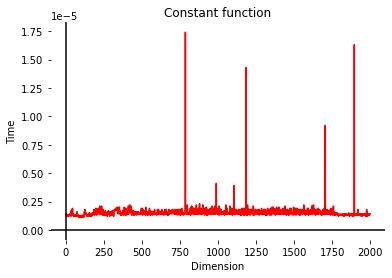

In [7]:
plot(df['constant_function'], 'Constant function')

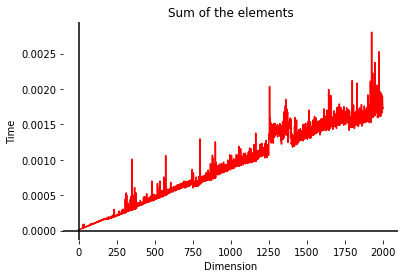

In [8]:
plot(df['sum_function'], 'Sum of the elements')

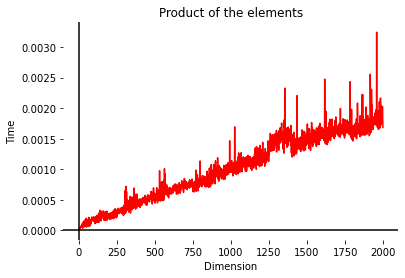

In [9]:
plot(df['product_function'], 'Product of the elements')

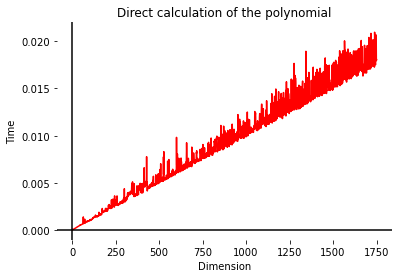

In [10]:
plot(df['naive_function'], 'Direct calculation of the polynomial')

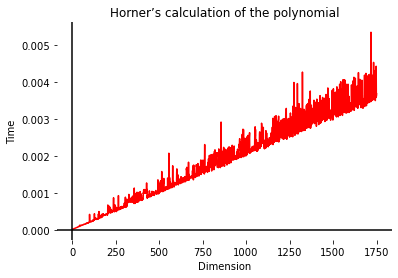

In [11]:
plot(df['horner_function'], 'Horner’s calculation of the polynomial')

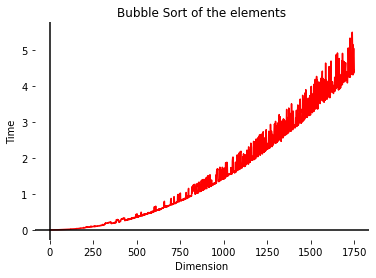

In [12]:
plot(df['bubblesort_function'], 'Bubble Sort of the elements')

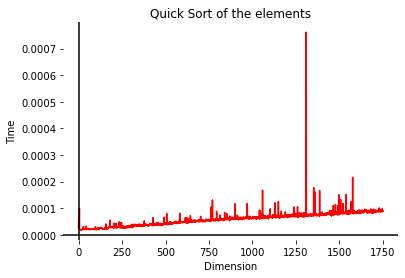

In [13]:
plot(df['quicksort_function'], 'Quick Sort of the elements')

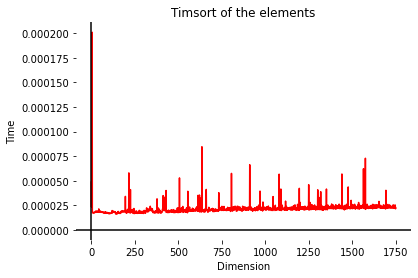

In [14]:
plot(df['timsort_function'], 'Timsort of the elements')

<a name='003'></a>

<h2>Appendix to Section II</h2>

Implementing the algorithms and functions.

In [3]:
def matmul_function(a, b):
    return np.matmul(a, b)

def dot_function(a, b):
    return np.dot(a, b)

Measuring the average computer execution time of programs implementing the algorithms and functions for five runs.

In [4]:
df = pd.read_csv('time.csv')
a = np.array([])
b = np.array([])

for i in range(1, 2000):
    try:
        a = np.random.randint(0, 100, size=(i, i))
        b = np.random.randint(0, 100, size=(i, i))
        
        df.loc[i-1, 'matmul_function'] = timeit.timeit(
            'matmul_function(a, b)',
            setup='from __main__ import matmul_function, a, b',
            number=5)
        
        df.loc[i-1, 'dot_function'] = timeit.timeit(
            'dot_function(a, b)',
            setup='from __main__ import dot_function, a, b',
            number=5)
    except:
        pass

Plotting the data obtained showing the average execution time.

In [5]:
def plot(data, label):
    plt.plot(data, c='r')
    
    ax = plt.gca()
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(label)
    
    plt.xlabel('Dimension')
    plt.ylabel('Time')
    plt.show()

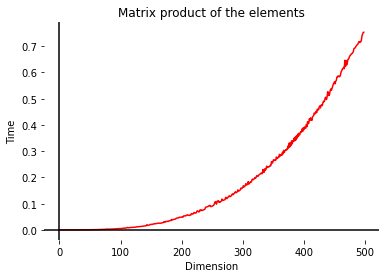

In [6]:
plot(df['matmul_function'], 'Matrix product of the elements')

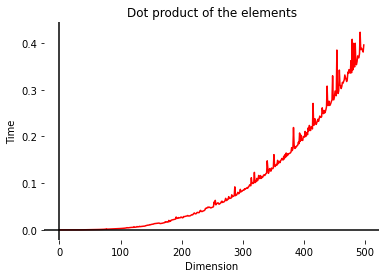

In [7]:
plot(df['dot_function'], 'Dot product of the elements')

In [10]:
df.to_csv('time.csv', index=False)